In [1]:
import json
from PIL import Image, ImageDraw
import pandas as pd

In [5]:
# --data_dir: 확인을 원하는 이미지들이 담긴 폴더 경로
# --model_dir: 확인을 원하는 모델 경로
!python inference_local.py --data_dir ../input/data/ICDAR17_Korean/val --model_dir trained_models/latest.pth

Inference in progress
100%|█████████████████████████████████████████| 499/499 [01:38<00:00,  5.06it/s]


In [16]:
pred_path = '/opt/ml/code/predictions/output.json' # 예측 결과 json file(두 번째 셀을 돌리면 생성됨)
gt_path = '/opt/ml/input/data/ICDAR17_Korean/ufo/val.json' # gt json file
img_path = '/opt/ml/input/data/ICDAR17_Korean/val/val_img_1.jpg' # 확인하고 싶은 이미지
img_name = img_path.split('/')[-1] # 이미지 파일명(예: val_img_1.jpg)

In [17]:
# pred bbox points 받아오기
with open(pred_path, 'r') as file:
    pred_data = json.load(file)

w = pred_data['images'][img_name]['words']
pred_points = []
for x in w:
    pred_points.append(w[x]['points'])

# gt bbox points 받아오기
with open(gt_path, 'r') as file:
    gt_data = json.load(file)

w = gt_data['images'][img_name]['words']
gt_points = []
for x in w:
    gt_points.append(w[x]['points'])

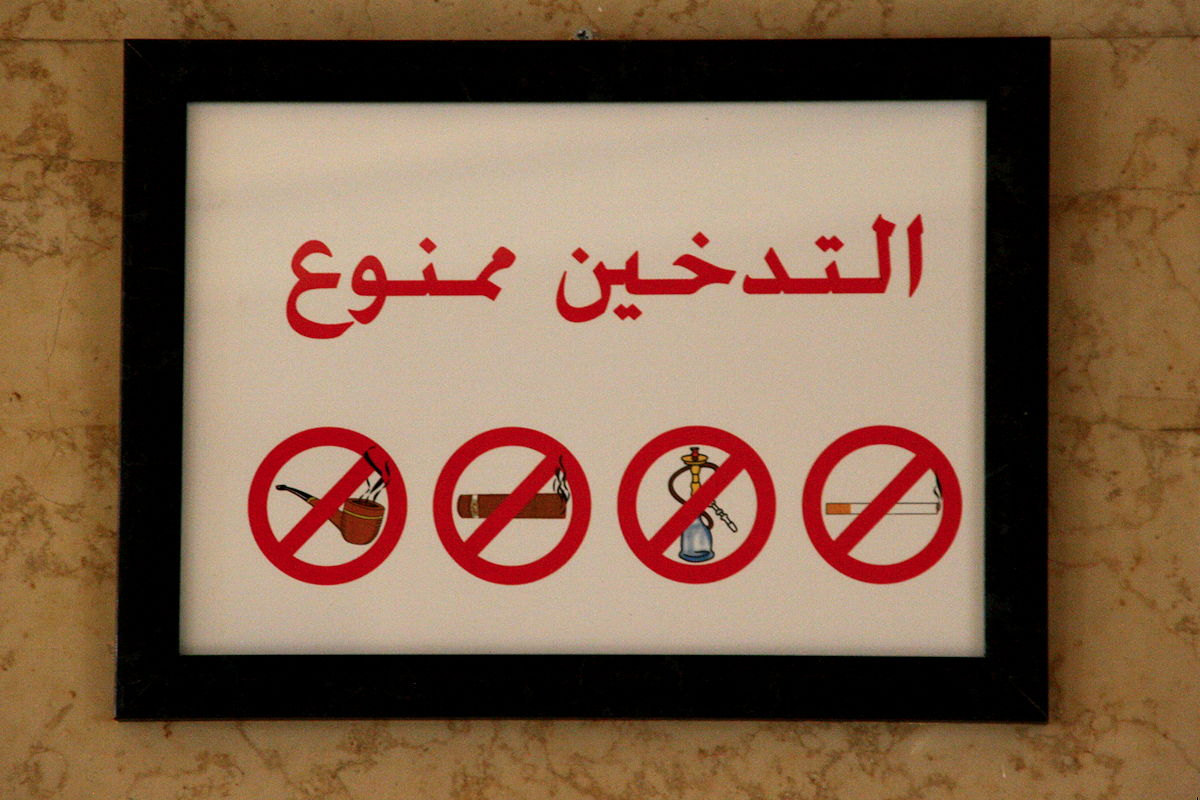

In [23]:
# bbox 없는 원본 이미지
img = Image.open(img_path)
img.show()

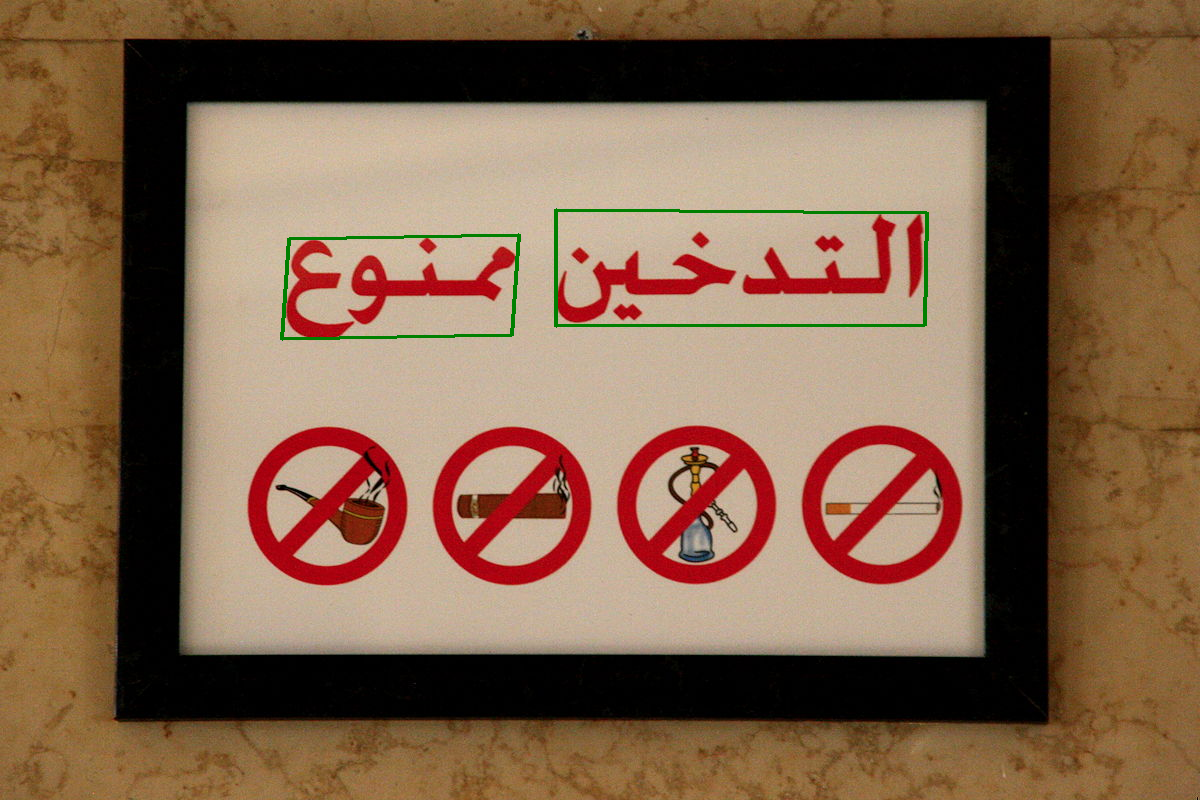

In [26]:
# gt bbox
img = Image.open(img_path)
draw = ImageDraw.Draw(img)
for x in gt_points:
    x1 = x[0] + x[1]
    x2 = x[1] + x[2]
    x3 = x[2] + x[3]
    x4 = x[3] + x[0]
    draw.line(x1, fill='green', width = 4)
    draw.line(x2, fill='green', width = 4)
    draw.line(x3, fill='green', width = 4)
    draw.line(x4, fill='green', width = 4)
img.show()

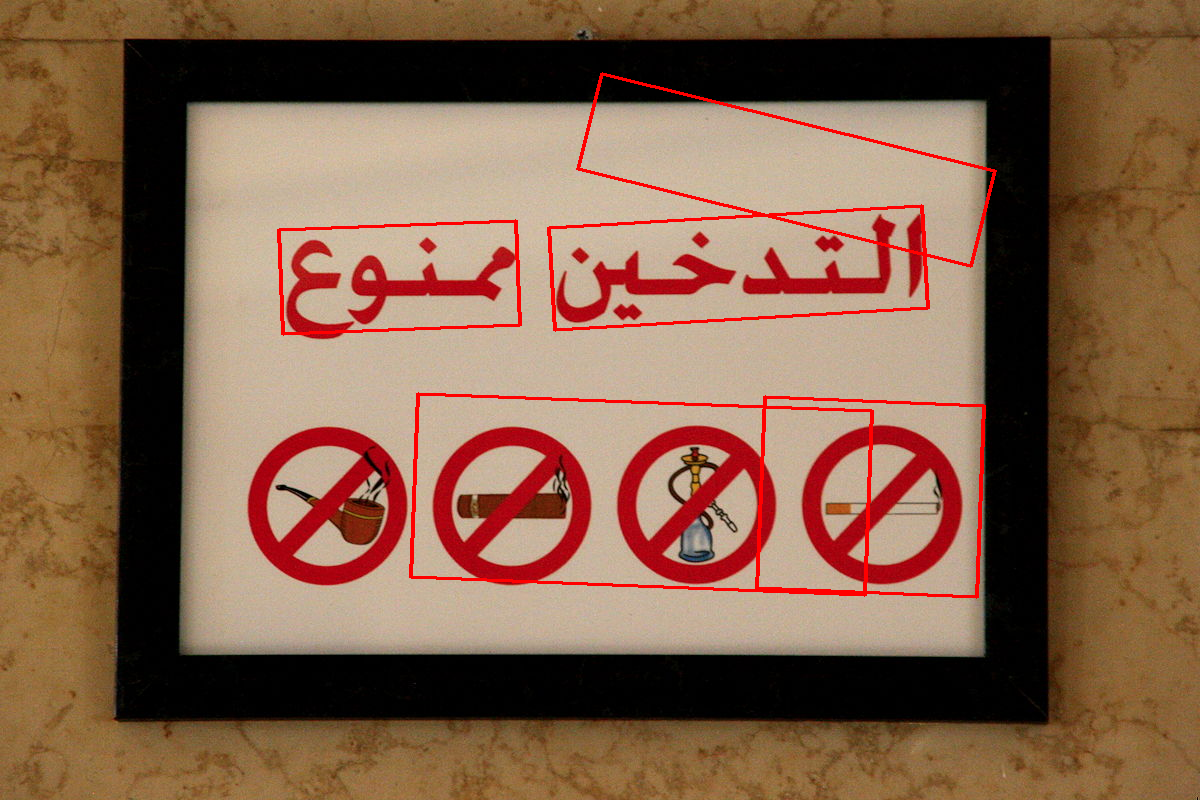

In [27]:
# pred bbox
img = Image.open(img_path)
draw = ImageDraw.Draw(img)
for x in pred_points:
    x1 = x[0] + x[1]
    x2 = x[1] + x[2]
    x3 = x[2] + x[3]
    x4 = x[3] + x[0]
    draw.line(x1, fill='red', width = 4)
    draw.line(x2, fill='red', width = 4)
    draw.line(x3, fill='red', width = 4)
    draw.line(x4, fill='red', width = 4)
img.show()

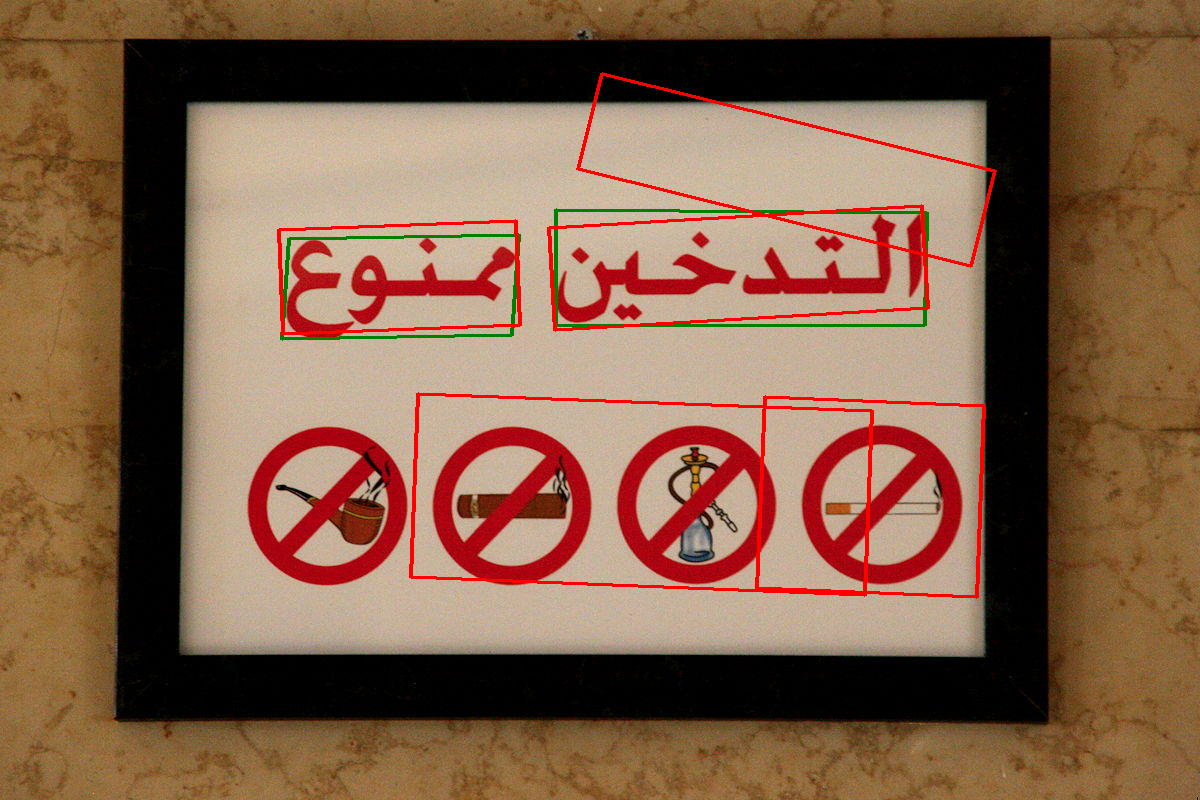

In [30]:
# both
img = Image.open(img_path)
draw = ImageDraw.Draw(img)
for x in gt_points:
    x1 = x[0] + x[1]
    x2 = x[1] + x[2]
    x3 = x[2] + x[3]
    x4 = x[3] + x[0]
    draw.line(x1, fill='green', width = 4)
    draw.line(x2, fill='green', width = 4)
    draw.line(x3, fill='green', width = 4)
    draw.line(x4, fill='green', width = 4)
for x in pred_points:
    x1 = x[0] + x[1]
    x2 = x[1] + x[2]
    x3 = x[2] + x[3]
    x4 = x[3] + x[0]
    draw.line(x1, fill='red', width = 4)
    draw.line(x2, fill='red', width = 4)
    draw.line(x3, fill='red', width = 4)
    draw.line(x4, fill='red', width = 4)
img.show()